# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
# Create api_key and units variables
api_key = weather_api_key
units = "imperial"
# Create query url for the api calls
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f'{url}appid={api_key}&units={units}&q='

In [85]:
# Print beginning lines
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Start new empty lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Start record counter
record = 1

# Start a for loop through cities list created above
for city in cities:
    
    # Use a try statement to start appending calls
    try: 
        response = requests.get(f"{query_url}{city}").json() 
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])        
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {record}| {city_record}")
        
        # Move on to the next record
        record = record + 1
        
        # set to just over 1 second so we don't exceed the API call limit
        time.sleep(1.02)
        
    # If no record is available, print skip and move on to the next call
    except:
        print("City not found. Skipping...")
        time.sleep(1.02)
    pass
    
# Print ending lines
print(f'-----------------------------')
print(f'Data Retrieval Complete')      
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1| Mataura
Processing Record 2| Rikitea
Processing Record 3| Kapaa
Processing Record 4| Ushuaia
Processing Record 5| Punta Arenas
Processing Record 6| Udachny
Processing Record 7| Srednekolymsk
Processing Record 8| Qaanaaq
Processing Record 9| Kaitangata
Processing Record 10| Ol'ga
Processing Record 11| Le Mans
Processing Record 12| Yellowknife
Processing Record 13| Buala
Processing Record 14| Atuona
Processing Record 15| Port Alfred
City not found. Skipping...
Processing Record 16| Lompoc
Processing Record 17| Saldanha
Processing Record 18| Castro
Processing Record 19| Opuwo
Processing Record 20| New Norfolk
Processing Record 21| Assiut
Processing Record 22| General Roca
City not found. Skipping...
Processing Record 23| Adrar
Processing Record 24| Upernavik
City not found. Skipping...
Processing Record 25| Busselton
Processing Record 26| Margate
Processing Record 27| Horta
Processing R

Processing Record 233| Arraial do Cabo
Processing Record 234| Toguchin
Processing Record 235| Beringovskiy
Processing Record 236| Fukuechō
Processing Record 237| Nouadhibou
Processing Record 238| Sitka
Processing Record 239| Martaban
Processing Record 240| Mandurah
Processing Record 241| La Santisima Trinidad
City not found. Skipping...
Processing Record 242| Saint-Joseph
Processing Record 243| São Filipe
Processing Record 244| Boffa
Processing Record 245| Batemans Bay
Processing Record 246| Isangel
Processing Record 247| Kidal
Processing Record 248| Bela
Processing Record 249| Charters Towers
City not found. Skipping...
Processing Record 250| Alice Springs
Processing Record 251| Te Anau
Processing Record 252| Barcelona
Processing Record 253| Schitu-Goleşti
Processing Record 254| Gemeente Terneuzen
Processing Record 255| Ayapel
Processing Record 256| Clyde River
Processing Record 257| Chuncheng
Processing Record 258| Alugan
Processing Record 259| Grottammare
Processing Record 260| Toma

Processing Record 464| Callaway
Processing Record 465| Valle Hermoso
Processing Record 466| Acurenam
Processing Record 467| Manaure
Processing Record 468| Artvin Province
Processing Record 469| Verkhnyaya Inta
Processing Record 470| Takoradze
Processing Record 471| Belaya Gora
Processing Record 472| Airai
Processing Record 473| Shihezi
Processing Record 474| Mpika
Processing Record 475| Leh
Processing Record 476| Port Blair
Processing Record 477| Novi Ligure
Processing Record 478| Quatre Cocos
Processing Record 479| Batagay-Alyta
Processing Record 480| Langsa
Processing Record 481| Marfino
Processing Record 482| Watrous
Processing Record 483| Rāmshīr
Processing Record 484| Bagdarin
Processing Record 485| Oodweyne
Processing Record 486| Umluj
Processing Record 487| Oriximiná
Processing Record 488| Gerede
Processing Record 489| Tutayev
Processing Record 490| Belomorsk
Processing Record 491| Warrington
Processing Record 492| Linxia Chengguanzhen
Processing Record 493| Caçapava do Sul
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [86]:
cities_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,66.00,67,100,10.00,NZ,1608257543
1,Rikitea,-23.12,-134.97,77.43,75,2,17.29,PF,1608257544
2,Kapaa,22.08,-159.32,80.60,69,20,14.99,US,1608257545
3,Ushuaia,-54.80,-68.30,42.80,75,75,29.97,AR,1608257267
4,Punta Arenas,-53.15,-70.92,48.20,61,100,9.17,CL,1608257548


In [87]:
cities_df.to_csv("../output_data/WeatherPy.csv", encoding="utf-8", index=False)

In [88]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.838319,20.748920,50.653487,76.899115,56.612389,8.153788,1.608258e+09
std,33.713611,88.156972,30.101113,17.565846,39.977700,6.061543,2.126918e+02
min,-54.800000,-179.170000,-49.000000,20.000000,0.000000,0.290000,1.608257e+09
25%,-7.750000,-54.040000,32.000000,69.000000,13.000000,3.360000,1.608258e+09
50%,20.930000,24.010000,60.800000,82.000000,75.000000,6.460000,1.608258e+09
75%,48.960000,97.030000,75.200000,90.000000,96.000000,11.270000,1.608258e+09
max,78.220000,179.320000,96.390000,100.000000,100.000000,35.120000,1.608258e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [89]:
max_hum = cities_df["Humidity"].max()
print(f"The maximum humidity is {max_hum}%.")
print(f"There are NO cities in the DF that exceed 100% humidity.")

The maximum humidity is 100%.
There are NO cities in the DF that exceed 100% humidity.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

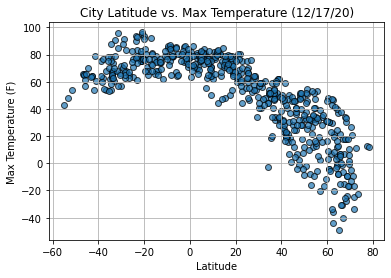

In [90]:
# Create variables
latitude = cities_df["Lat"]
maximum_temp = cities_df["Max Temp"]

# Create scatter plot
plt.scatter(latitude, maximum_temp, marker="o", edgecolor="black", alpha=0.7)
plt.title("City Latitude vs. Max Temperature (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/lat_temp.png")
plt.show()

This plot shows that the closer a city is to the equator, the higher the max temperature will be. It gets much colder as you move higher north.

## Latitude vs. Humidity Plot

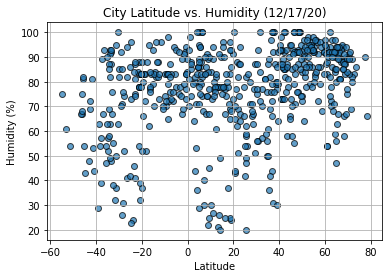

In [91]:
# Create variables and scatter plot
latitude = cities_df["Lat"]
humidity = cities_df["Humidity"]

# Create scatter plot
plt.scatter(latitude, humidity, marker="o", edgecolor="black", alpha=0.7)
plt.title("City Latitude vs. Humidity (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/lat_humidity.png")
plt.show()

This plot shows that there is not much of a correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

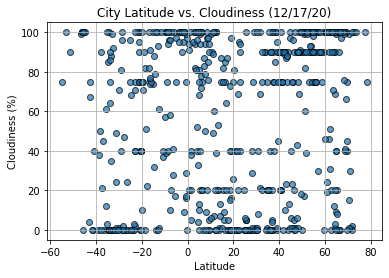

In [92]:
# Create variables
latitude = cities_df["Lat"]
cloudiness = cities_df["Cloudiness"]

# Create Scatter Plot
plt.scatter(latitude, cloudiness, marker="o", edgecolor="black", alpha=0.7)
plt.title("City Latitude vs. Cloudiness (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/lat_cloudiness.png")
plt.show()

There seems to be no correlation between latitude and cloudiness as well.

## Latitude vs. Wind Speed Plot

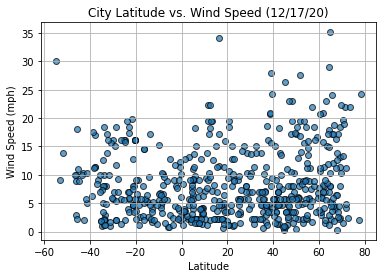

In [93]:
# Create variables
latitude = cities_df["Lat"]
wind = cities_df["Wind Speed"]

# Create Scatter Plot
plt.scatter(latitude, wind, marker="o", edgecolor="black", alpha=0.7)
plt.title("City Latitude vs. Wind Speed (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/lat_windspeed.png")
plt.show()

Though there isn't much of a correlation here. There are high and low windspeeds across all latitudes.

## Linear Regression

In [94]:
# Import linregress
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8500682824295844


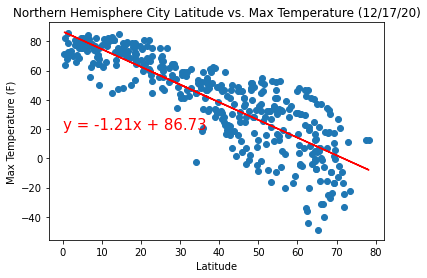

In [95]:
# Create variables
north_cities = cities_df[cities_df["Lat"] >= 0] 
latitude = north_cities["Lat"]
maximum_temp = north_cities["Max Temp"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, maximum_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot w/ linear regression analysis
plt.scatter(latitude, maximum_temp, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/north_lat_temp_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5007781061063413


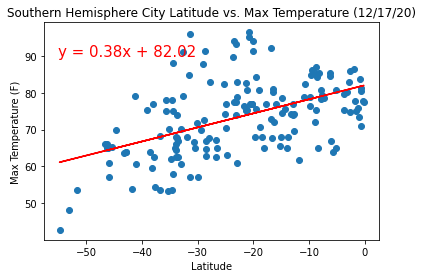

In [96]:
# Create variables
south_cities = cities_df[cities_df["Lat"] < 0] 
latitude = south_cities["Lat"]
maximum_temp = south_cities["Max Temp"]
# date = cities_df["date"].unique()

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, maximum_temp)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot w/ linear regression analysis
plt.scatter(latitude, maximum_temp, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/south_lat_temp_regression.png")
plt.show()

According to these two regression models for latitude vs. maximum temperature, there is a positive correlation as the the latitude moves closer to 0 and a negative correlation as the latitude moves futher away from 0. This means that as the maximum temperatures for both models are highest at the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2939948517971716


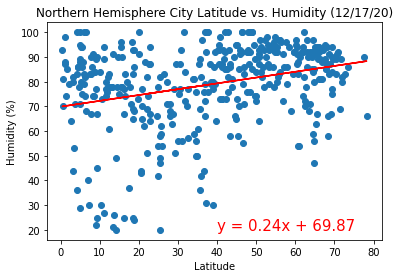

In [97]:
# Create variables
latitude = north_cities["Lat"]
humidity = north_cities["Humidity"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter and plot linear regression analysis
plt.scatter(latitude, humidity, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Humidity (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/north_lat_humidity_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3533011479757976


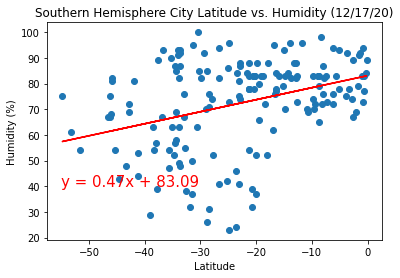

In [98]:
# Create variables 
latitude = south_cities["Lat"]
humidity = south_cities["Humidity"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and include linear regression model
plt.scatter(latitude, humidity, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Humidity (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/south_lat_humidity_regression.png")
plt.show()

When lookin at the data, the regression models are very similar. There isn't much analysis to be done here as it seems there is a positive trend for humidity as moving up from the southern hemisphere to the equator, and also a positive trend when moving up from the equator to the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21573810895841952


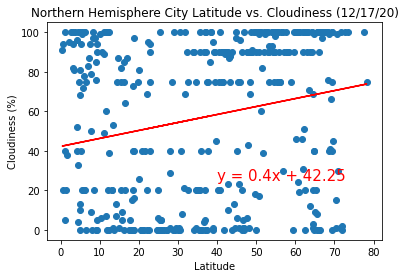

In [99]:
# Create variables
latitude = north_cities["Lat"]
cloudiness = north_cities["Cloudiness"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and include linear regression model
plt.scatter(latitude, cloudiness, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/north_lat_cloudiness_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17998471857901577


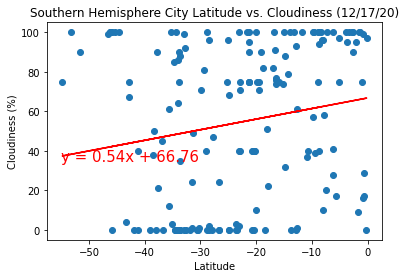

In [100]:
# Create variables
latitude = south_cities["Lat"]
cloudiness = south_cities["Cloudiness"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and include linear regression model
plt.scatter(latitude, cloudiness, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/south_lat_cloudiness_regression.png")
plt.show()

Similar to humidity, there is a positive correlation moving from the southern hemisphere to the equator and a positive correlation moving up from the equator to the nothern hemisphere in terms of cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1893915199336283


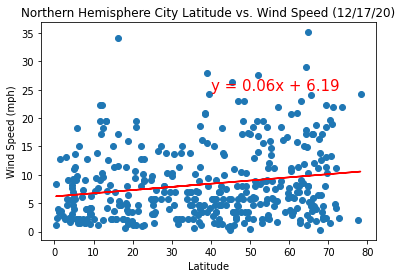

In [101]:
# Create variables
latitude = north_cities["Lat"]
wind_speed = north_cities["Wind Speed"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and include linear regression model
plt.scatter(latitude, wind_speed, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/north_lat_windspeed_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23721842185093975


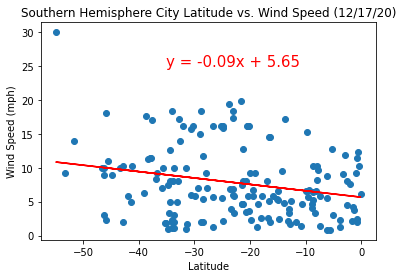

In [102]:
# Create variables 
latitude = south_cities["Lat"]
wind_speed = south_cities["Wind Speed"]

# Calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot and include linear regression model
plt.scatter(latitude, wind_speed, marker="o")
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-35,25),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (12/17/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/south_lat_windspeed_regression.png")
plt.show()

There seems to be no much correlation between windspeed and longitude and latitude. There are a few outliers with high windspeeds throughout the different latitude ranges.